In [125]:
from DDPGv2Agent import Agent
from DDPGv2Agent import Noise
from collections import deque
from FireflyEnv import Model # firefly_task.py
import matplotlib.pyplot as plt

# read configuration parameters
from Config import Config
arg = Config()
# fix random seed
import random
random.seed(arg.SEED_NUMBER)
import torch
torch.manual_seed(arg.SEED_NUMBER)
if torch.cuda.is_available():
    torch.cuda.manual_seed(arg.SEED_NUMBER)
import numpy as np
np.random.seed(arg.SEED_NUMBER)
import time


torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import datetime
import pandas as pd

filename = '20191016-205855-4' # agent information
df = pd.read_csv('../firefly-inverse-data/data/' + filename + '_log.csv',
                 usecols=['discount_factor','process gain forward', 'process gain angular', 'process noise std forward',
                          'process noise std angular', 'obs gain forward', 'obs gain angular', 'obs noise std forward',
                          'obs noise std angular', 'goal radius'])

DISCOUNT_FACTOR = df['discount_factor'][0]
gains_range = [np.floor(df['process gain forward'].min()), np.ceil(df['process gain forward'].max()),
               np.floor(df['process gain angular'].min()), np.ceil(df['process gain angular'].max())]

std_range = [df['process noise std forward'].min(), df['process noise std forward'].max(),
               df['process noise std angular'].min(), df['process noise std angular'].max()]
goal_radius_range = [df['goal radius'].min(), df['goal radius'].max()]


env = Model(arg) # build an environment
x, pro_gains, pro_noise_stds, goal_radius = env.reset(gains_range, std_range, goal_radius_range)

state_dim = env.state_dim
action_dim = env.action_dim

MAX_EPISODE = 100
std = 0.00001 #0.05
noise = Noise(action_dim, mean=0., std=std)

agent = Agent(state_dim, action_dim, arg,  filename, hidden_dim=128, gamma=DISCOUNT_FACTOR, tau=0.001)
agent.load(filename)

tot_t = 0.
episode = 0.

b, state, obs_gains, obs_noise_stds = agent.Bstep.reset(x, torch.zeros(1), pro_gains, pro_noise_stds, 
                                                        goal_radius, gains_range, std_range)  # reset monkey's internal model

t = torch.zeros(1) # to track the amount of time steps to catch a firefly

Running DDPG Agent: using  cpu


Text(0, 0.5, 'action')

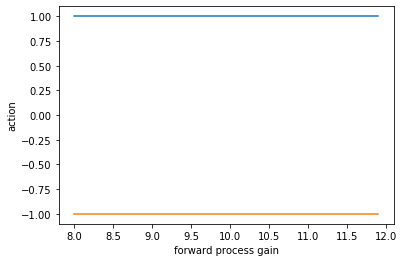

In [150]:
val_range = np.arange(gains_range[0],gains_range[1],0.1)
actions = np.zeros([len(val_range),2])

for id, val in enumerate(val_range):
    pro_gains[0]= val
    theta = pro_gains, pro_noise_stds, obs_gains, obs_noise_stds, goal_radius
   
    state = agent.Bstep.Breshape(b, t, theta)
    actions[id] = agent.select_action(state)  # with action noise
    
plt.figure;
plt.plot(val_range, actions)
plt.xlabel('forward process gain')
plt.ylabel('action')

In [151]:
theta

(tensor([11.9000, 16.9000]),
 tensor([1.0000, 1.9000]),
 tensor([ 8.9963, 14.9694]),
 tensor([1.2597, 1.1298]),
 0.4000006079673767)

Text(0, 0.5, 'action')

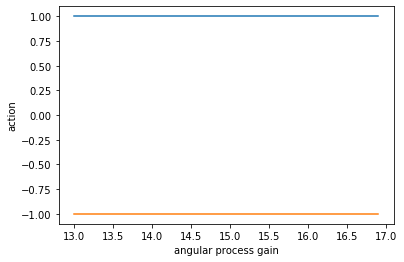

In [152]:
val_range = np.arange(gains_range[2],gains_range[3],0.1)
#val_range = np.arange(0,20,0.1)
actions = np.zeros([len(val_range),2])

for id, val in enumerate(val_range):
    pro_gains[1]= val
    theta = pro_gains, pro_noise_stds, obs_gains, obs_noise_stds, goal_radius
   
    state = agent.Bstep.Breshape(b, t, theta)
    actions[id] = agent.select_action(state)  # with action noise
    
plt.figure;
plt.plot(val_range, actions)
plt.xlabel('angular process gain')
plt.ylabel('action')

Text(0, 0.5, 'action')

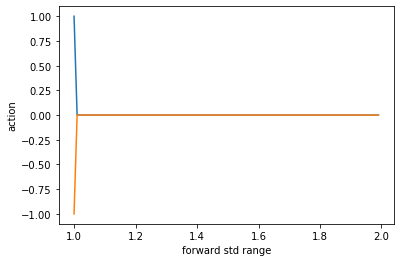

In [153]:
val_range = np.arange(std_range[0],std_range[1],0.01)
actions = np.zeros([len(val_range),2])

for id, pro_noise_std_vel in enumerate(np.arange(std_range[0],std_range[1])):
    pro_noise_stds[0]= pro_noise_std_vel
    theta = pro_gains, pro_noise_stds, obs_gains, obs_noise_stds, goal_radius
   
    state = agent.Bstep.Breshape(b, t, theta)
    actions[id] = agent.select_action(state)  # with action noise
    
plt.figure;
plt.plot(val_range, actions)
plt.xlabel('forward std range')
plt.ylabel('action')

Text(0, 0.5, 'action')

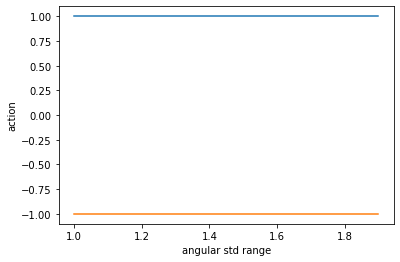

In [154]:
val_range = np.arange(std_range[2],std_range[3],0.1)
actions = np.zeros([len(val_range),2])

for id, val in enumerate(val_range):
    pro_noise_stds[1]= val
    theta = pro_gains, pro_noise_stds, obs_gains, obs_noise_stds, goal_radius
   
    state = agent.Bstep.Breshape(b, t, theta)
    actions[id] = agent.select_action(state)  # with action noise
    
plt.figure;
plt.plot(val_range, actions)
plt.xlabel('angular std range')
plt.ylabel('action')

0.3000006079673767
0.4000006079673767


Text(0, 0.5, 'action')

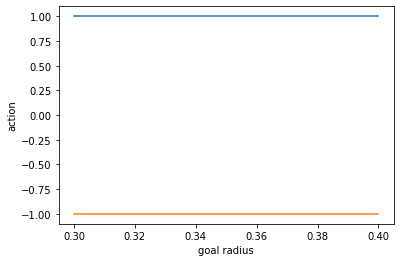

In [155]:
val_range = np.arange(goal_radius_range[0],goal_radius_range[1],0.1)
actions = np.zeros([len(val_range),2])

for id, val in enumerate(val_range):
    goal_radius= val
    print(val)
    theta = pro_gains, pro_noise_stds, obs_gains, obs_noise_stds, goal_radius
   
    state = agent.Bstep.Breshape(b, t, theta)
    actions[id] = agent.select_action(state)  # with action noise
    
plt.figure;
plt.plot(val_range, actions)
plt.xlabel('goal radius')
plt.ylabel('action')

In [156]:
state

tensor([[7.6635e-01, 6.2273e-01, 0.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e-04,
         0.0000e+00, 1.0000e-04, 0.0000e+00, 0.0000e+00, 1.0000e-04, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 1.0000e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         -0.0000e+00, 1.0000e-04, 1.1900e+01, 1.6900e+01, 1.0000e+00, 1.9000e+00,
         8.9963e+00, 1.4969e+01, 1.2597e+00, 1.1298e+00, 4.0000e-01]])

In [157]:
action= agent.select_action(state)
t = t +1
next_x, reached_target = env(x, action.view(-1)) #track true next_x of monkey
next_ox = agent.Bstep.observations(next_x)  # observation
next_b, info = agent.Bstep(b, next_ox, action, env.box) # belief next state, info['stop']=terminal # reward only depends on belief
next_state = agent.Bstep.Breshape(next_b, t, theta) # state used in policy is different from belief
state = next_state


In [124]:
state

tensor([[ 1.0305e-01,  1.1543e+00,  1.4511e+00, -6.7515e-01,  5.0000e+00,
          1.0000e-04, -1.2471e-08,  1.0001e-04,  8.9642e-07, -1.3909e-06,
          9.9986e-05,  0.0000e+00,  0.0000e+00,  0.0000e+00,  1.3867e-01,
          0.0000e+00,  0.0000e+00,  0.0000e+00, -0.0000e+00,  7.5415e-02,
          1.1900e+01,  1.6900e+01,  1.0000e+00,  1.9000e+00,  8.9963e+00,
          1.4969e+01,  1.2597e+00,  1.1298e+00,  4.0000e-01]])

In [144]:
thetas = [[pro_gain_vel, pro_gain_ang, obs_gain_vel, obs_gain_ang, goal_radius] 
            for pro_gain_vel in range(int(gains_range[0]),int(gains_range[1])) 
            for pro_gain_ang in range(int(gains_range[2]),int(gains_range[3]))
            for obs_gain_vel in range(int(gains_range[0]),int(gains_range[1])) 
            for obs_gain_ang in range(int(gains_range[2]),int(gains_range[3]))
            for goal_radius in np.arange(0.35,0.4, 0.01)]